In [7]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from pathlib import Path


In [8]:
all_files = pd.read_csv('../data/cormac/metadata/all_episodes.csv', sep='|', quoting=csv.QUOTE_NONE)
all_files.shape

(5279, 14)

In [15]:
motion_folder_loc = Path('../data/cormac/processed_sm0_0_86fps')

x = 0
final_output = []
not_found_filename = []
for _, row in all_files.iterrows():
    if not (motion_folder_loc / row['file']).with_suffix('.expmap_86.1328125fps.pkl').exists():
        not_found_filename.append(row['file'])
        x += 1
    else:
        final_output.append(row)

final_output = pd.DataFrame(final_output)

In [16]:
", ".join(not_found_filename)

'C2_2_0000, C3_1_0003, C3_1_0006, C3_1_0009, C3_1_0011, C3_1_0014, C3_1_0018, C3_1_0020, C3_1_0022, C3_1_0024, C3_1_0026, C3_1_0028, C3_1_0031, C3_1_0033, C3_1_0036, C3_1_0038, C3_1_0041, C3_1_0044, C3_1_0046, C3_1_0048, C3_1_0051, C3_1_0053, C3_1_0055, C3_1_0057, C3_1_0059, C3_1_0062, C3_1_0064, C3_1_0067, C3_1_0069, C3_1_0071, C3_1_0073, C3_1_0075, C3_1_0078, C3_1_0080, C3_1_0082, C3_1_0084, C3_1_0086, C3_1_0088, C3_1_0090, C3_1_0092, C3_1_0095, C3_1_0097, C3_1_0099, C3_1_0101, C3_1_0104, C3_1_0106, C3_1_0108, C3_1_0111, C3_1_0113, C3_1_0116, C3_1_0118, C3_1_0121, C3_1_0123, C3_1_0125, C3_1_0127, C3_1_0129, C3_1_0132, C3_1_0135, C3_1_0137, C3_1_0139, C3_1_0141, C3_1_0143, C3_1_0145, C3_1_0147, C3_1_0150, C3_1_0152, C3_1_0155, C3_1_0157, C3_1_0159, C3_1_0161, C3_1_0164, C3_1_0166, C3_1_0170, C3_1_0172, C3_1_0175, C3_1_0177, C3_1_0179, C3_1_0182, C3_1_0184, C3_1_0187, C3_1_0189, C3_1_0191, C3_1_0193, C3_1_0195, C3_1_0197, C3_1_0200, C3_1_0202, C3_1_0204, C3_1_0206, C3_1_0209, C3_1_0212

In [17]:
file_text = final_output[['file', 'text']]
file_text['file'] = 'data/cormac/wavs/' + file_text['file'] + '.wav'

/tmp/ipykernel_524623/626341827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_text['file'] = 'data/cormac/wavs/' + file_text['file'] + '.wav'


In [29]:
train, val = train_test_split(file_text, test_size=0.0203, random_state=1234)
train.shape, val.shape

((4812, 2), (100, 2))

In [30]:
train.to_csv('../data/filelists/cormac_train.txt', sep='|', index=False, header=False, quoting=csv.QUOTE_NONE)
val.to_csv('../data/filelists/cormac_val.txt', sep='|', index=False, header=False, quoting=csv.QUOTE_NONE)

In [1]:
import pandas as pd

In [3]:
df = pd.read_pickle("../data/cormac/processed_sm0_0_86fps/C1_1_0003.expmap_86.1328125fps.pkl")

In [4]:
df.head()

,LeftHand_alpha,LeftHand_beta,LeftHand_gamma,LeftForeArm_alpha,LeftForeArm_beta,LeftForeArm_gamma,LeftArm_alpha,LeftArm_beta,LeftArm_gamma,LeftShoulder_alpha,...,Spine3_gamma,Spine2_alpha,Spine2_beta,Spine2_gamma,Spine1_alpha,Spine1_beta,Spine1_gamma,Spine_alpha,Spine_beta,Spine_gamma
0 days 00:00:00,0.061189,0.006385,0.207861,0.497793,0.319127,0.081876,0.417148,0.700367,-1.103815,-0.181637,...,0.040431,0.016425,-0.002723,0.010122,0.069539,0.002240,-0.007885,-0.070522,-0.005675,-0.014910
0 days 00:00:00.011609977,0.061381,0.006408,0.207968,0.497470,0.319219,0.081844,0.417400,0.699947,-1.103958,-0.181490,...,0.040453,0.016338,-0.002812,0.010179,0.069600,0.002227,-0.007866,-0.070436,-0.005657,-0.014845
0 days 00:00:00.023219954,0.062276,0.006485,0.207474,0.496337,0.320264,0.081921,0.417739,0.698852,-1.104534,-0.181183,...,0.040434,0.016205,-0.002995,0.010230,0.069665,0.002203,-0.007842,-0.070287,-0.005616,-0.014771
0 days 00:00:00.034829931,0.063287,0.006569,0.206803,0.495060,0.321494,0.082021,0.418106,0.697639,-1.105180,-0.180840,...,0.040394,0.016055,-0.003227,0.010287,0.069750,0.002174,-0.007807,-0.070092,-0.005564,-0.014689
0 days 00:00:00.046439909,0.063721,0.006601,0.206387,0.494472,0.322017,0.082056,0.418438,0.696980,-1.105479,-0.180614,...,0.040332,0.015908,-0.003471,0.010373,0.069876,0.002141,-0.007743,-0.069838,-0.005514,-0.014588


In [6]:
import matplotlib.pyplot as plt

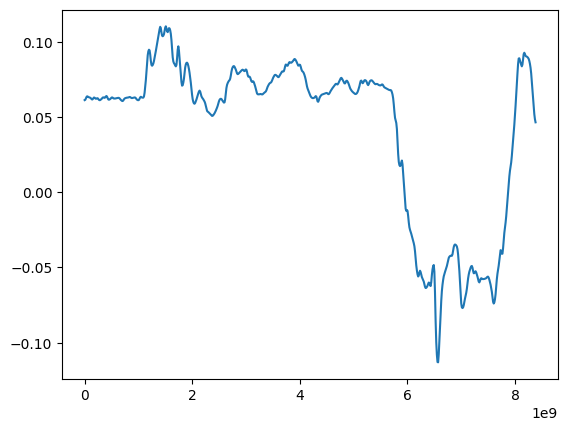

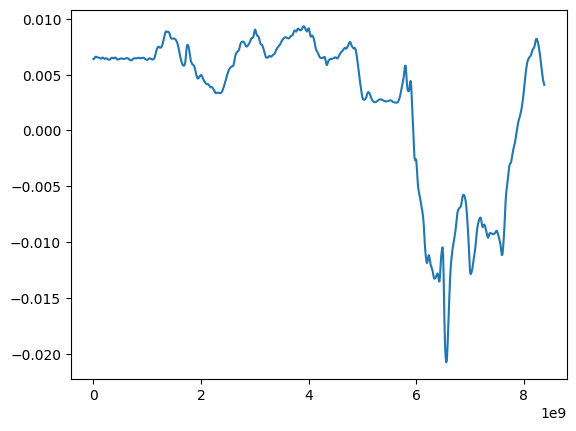

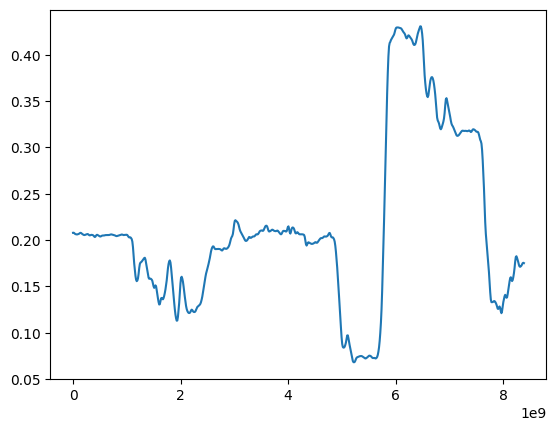

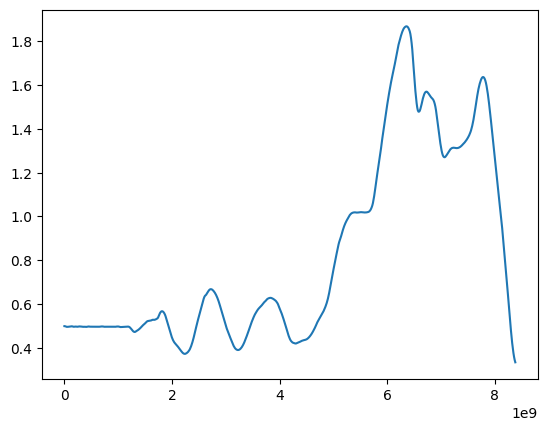

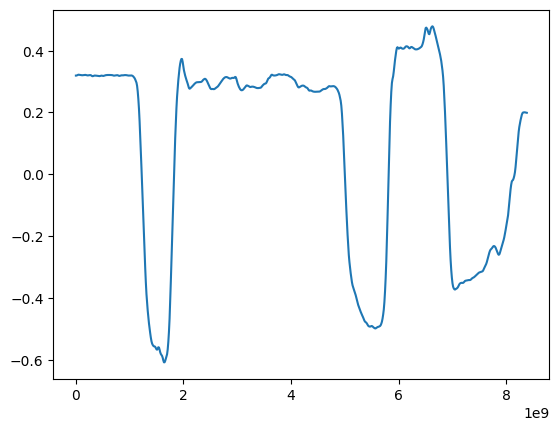

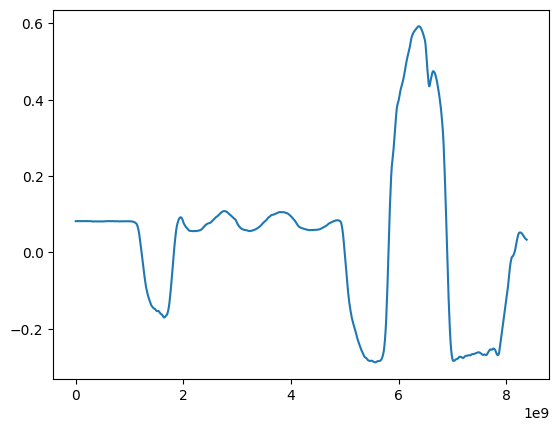

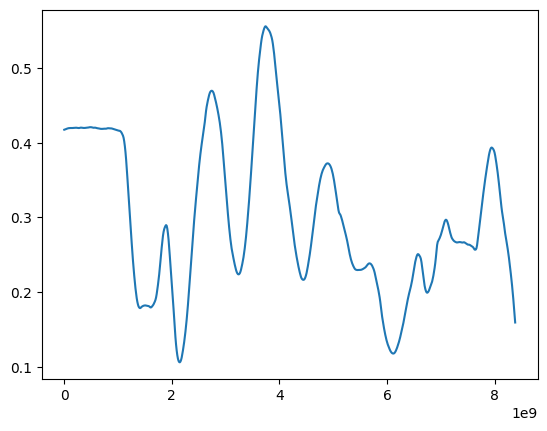

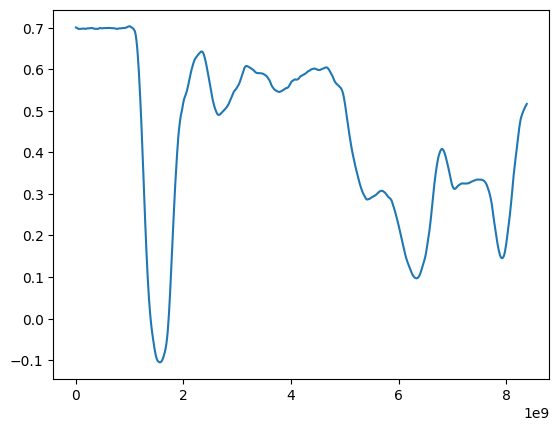

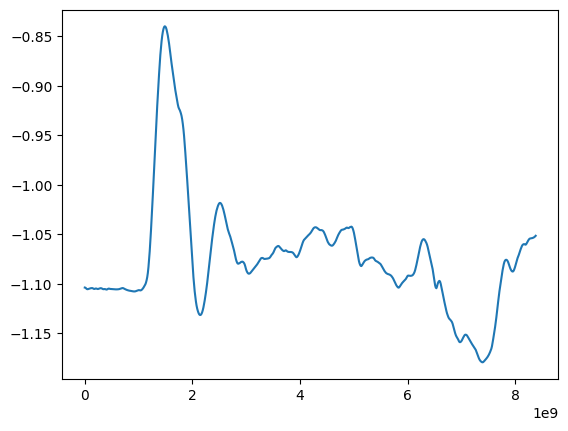

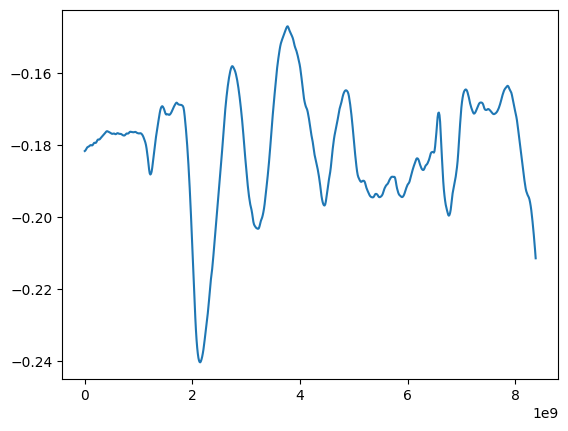

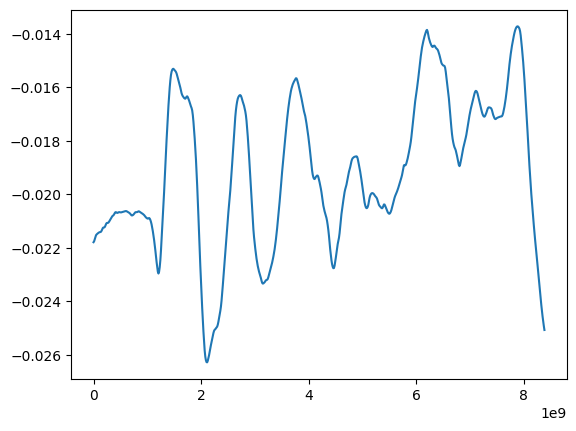

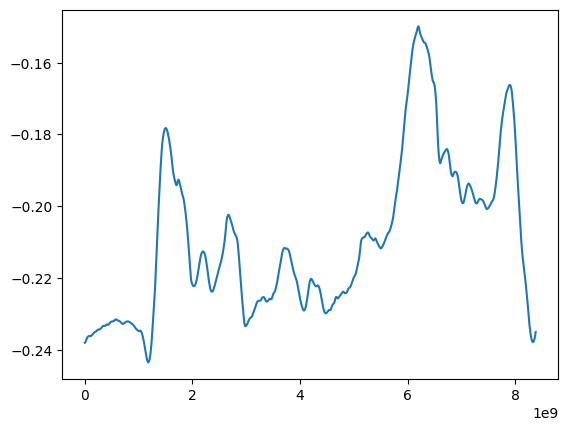

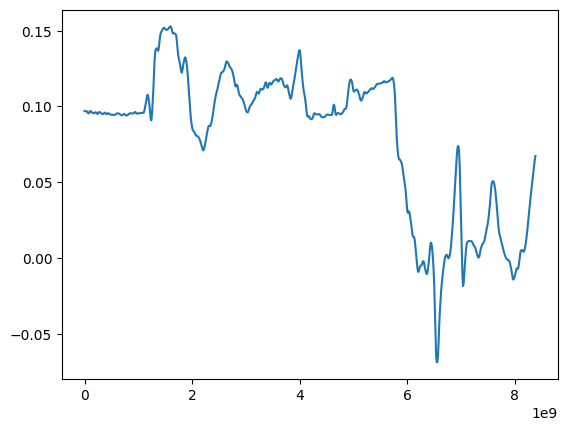

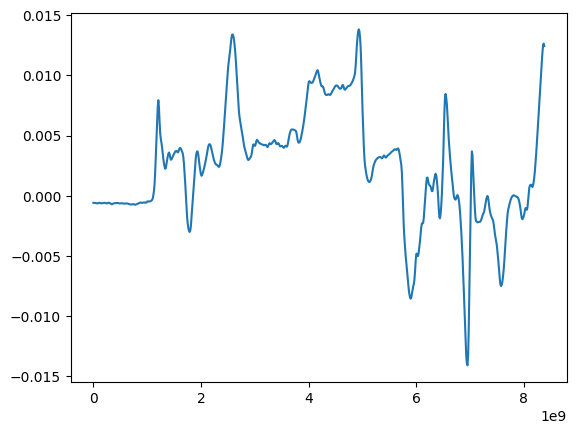

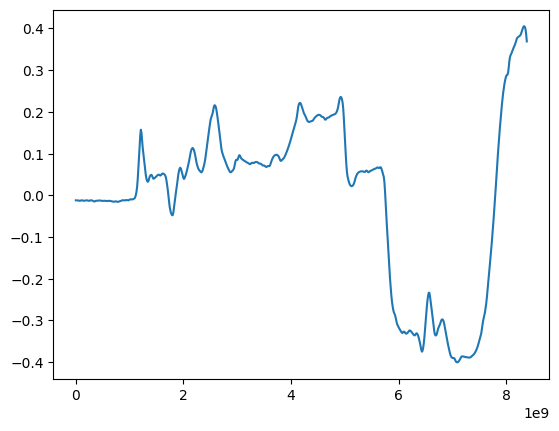

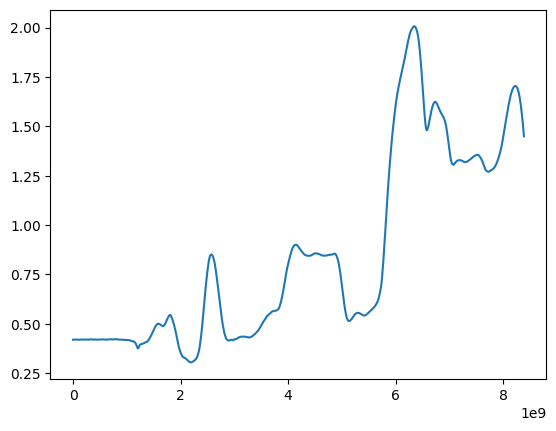

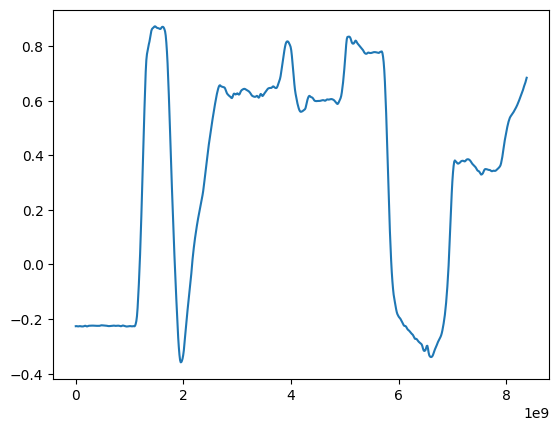

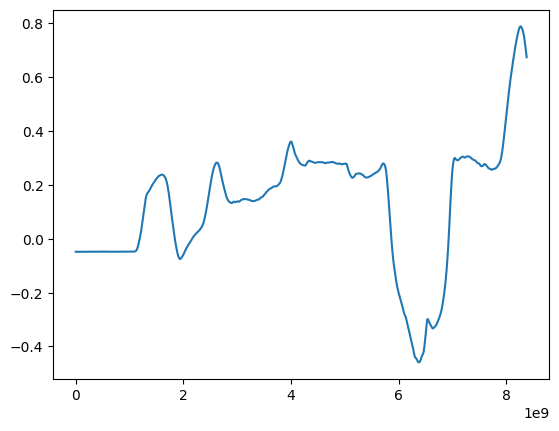

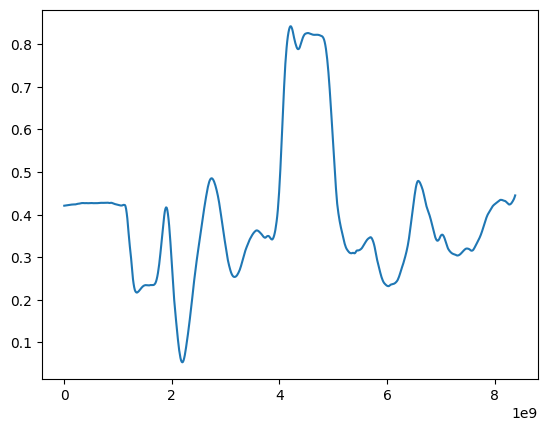

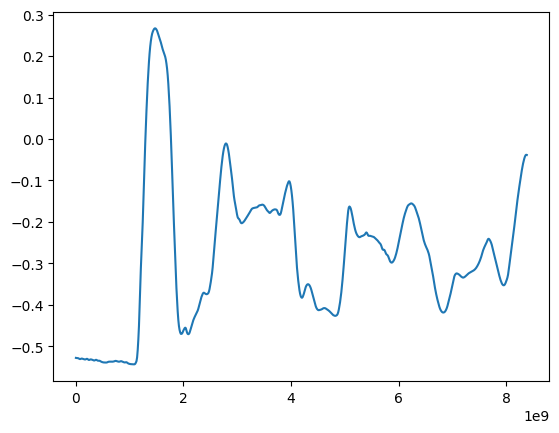

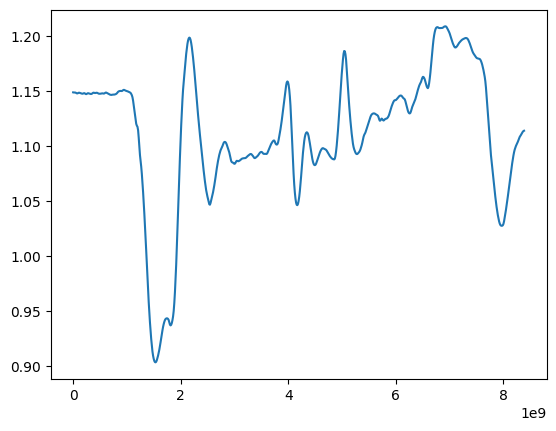

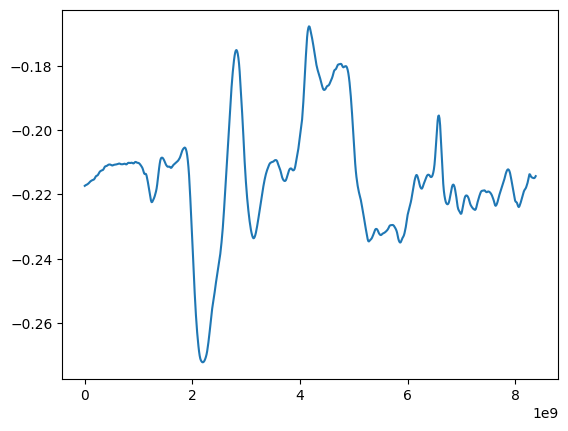

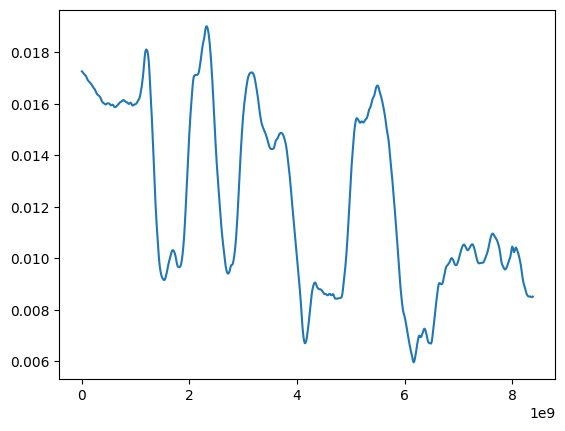

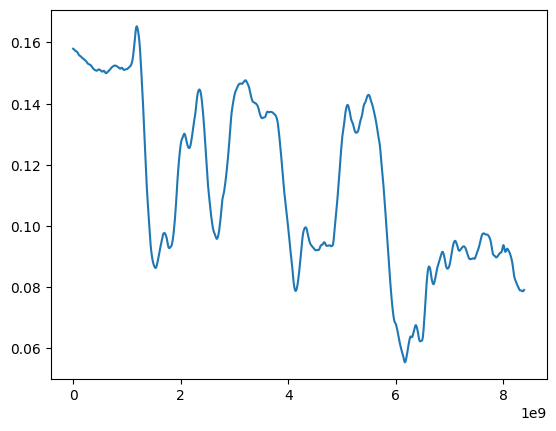

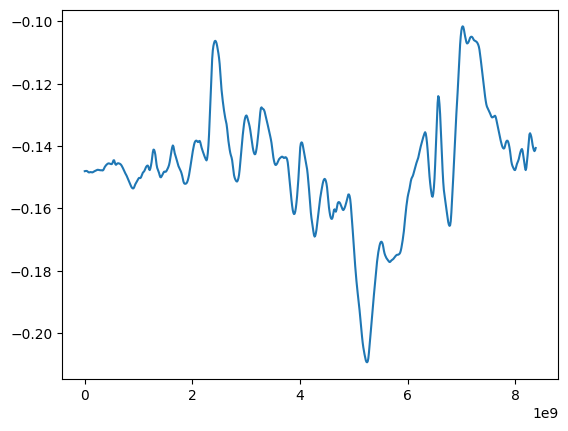

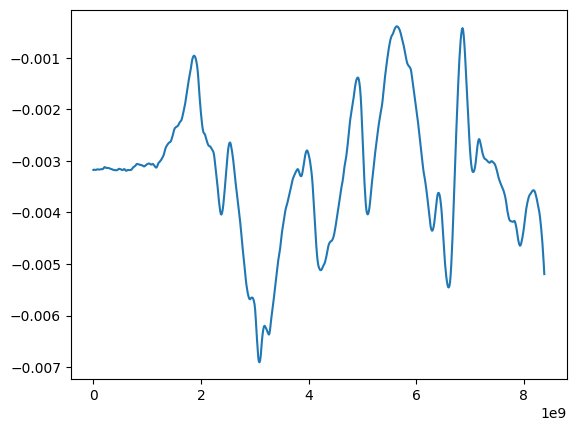

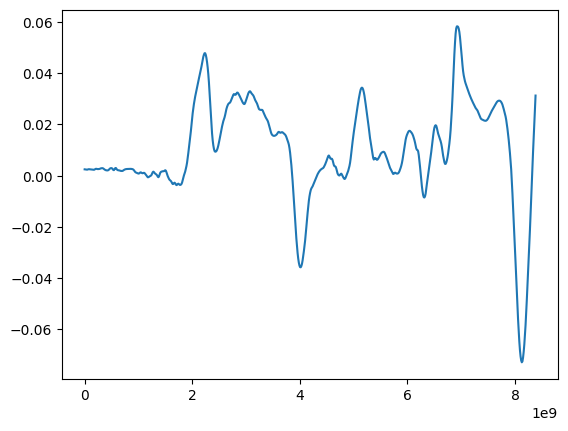

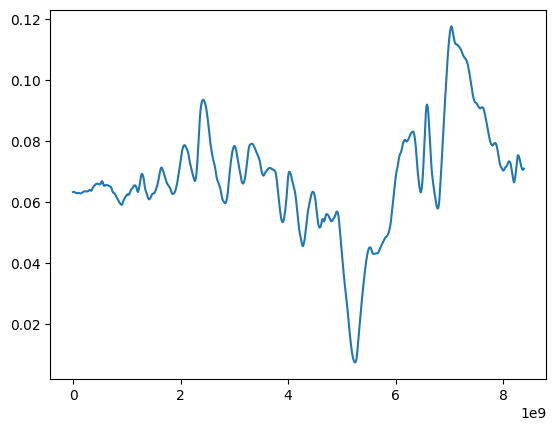

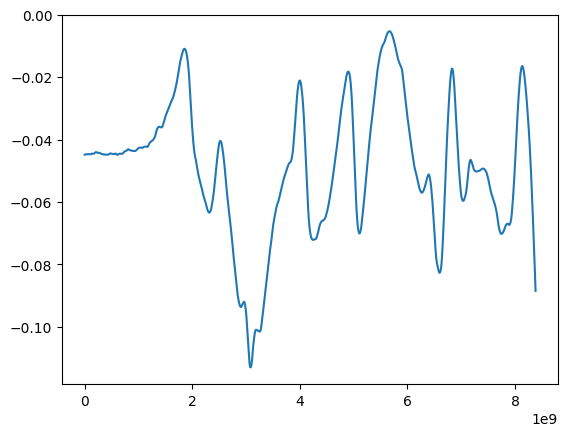

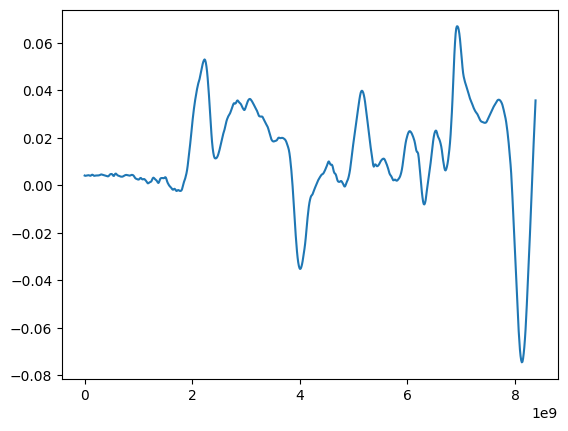

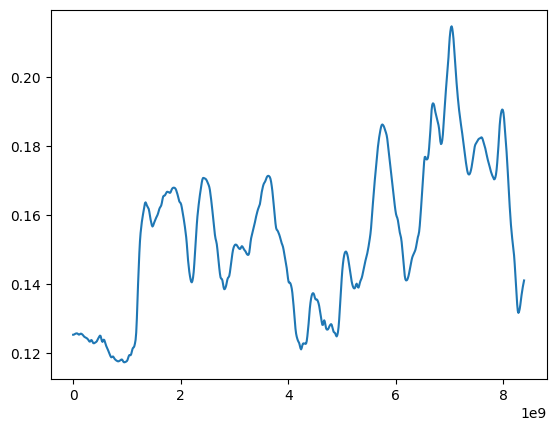

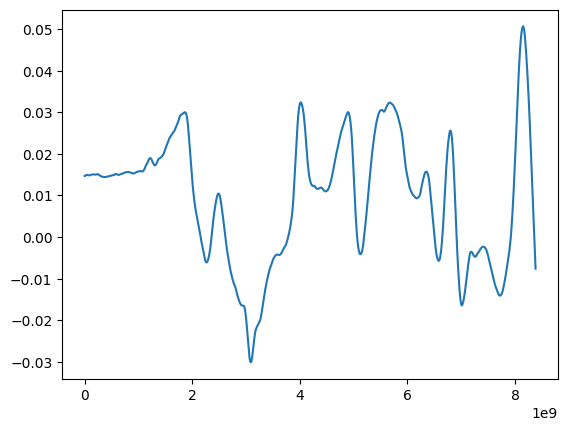

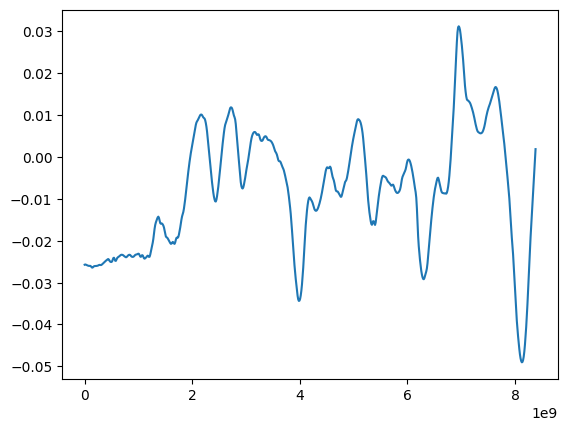

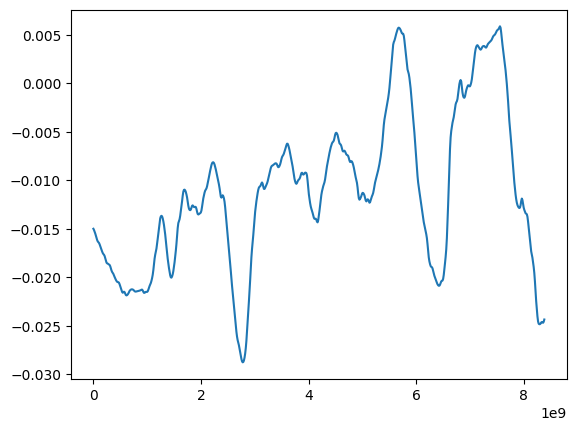

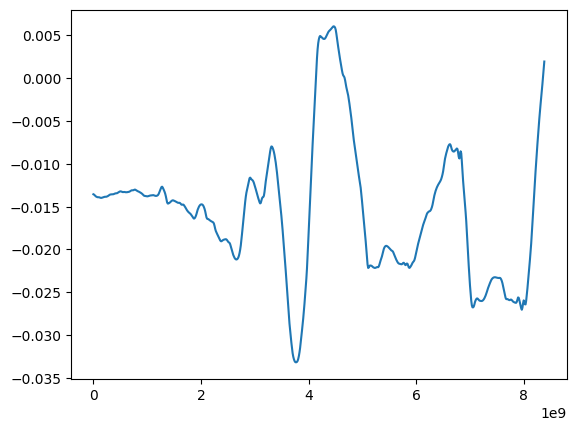

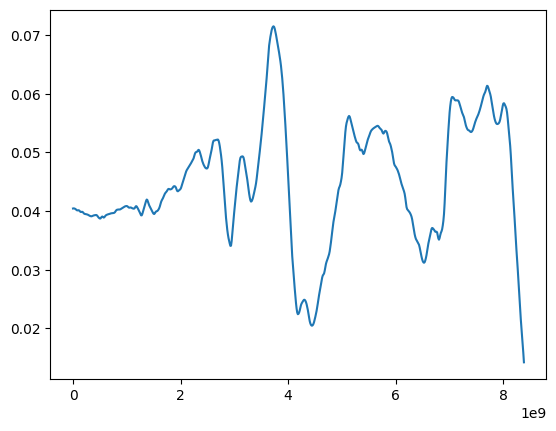

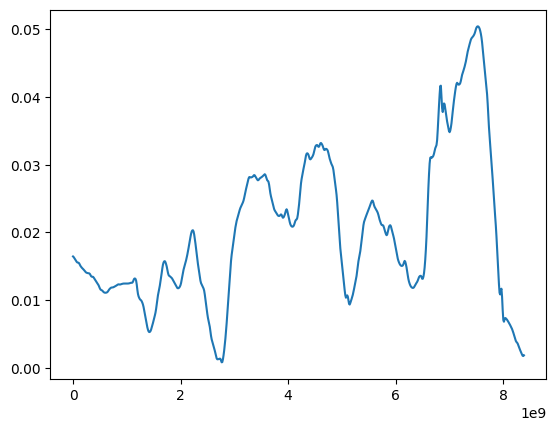

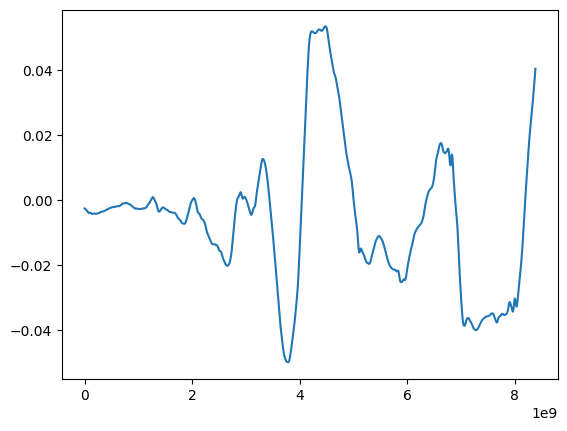

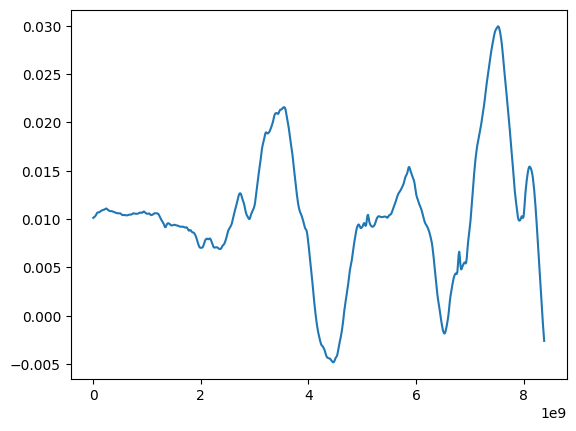

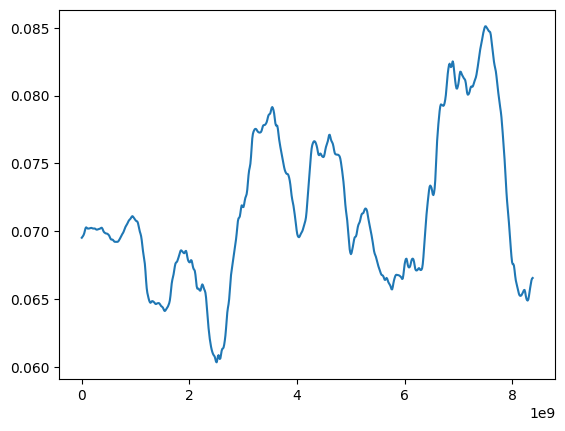

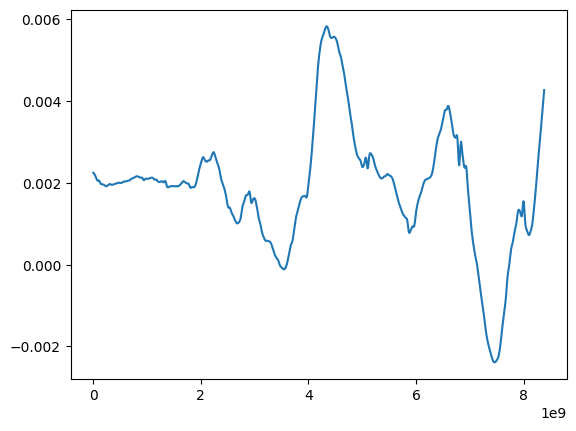

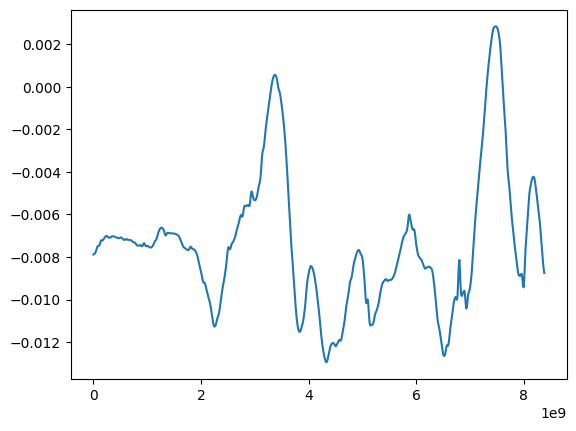

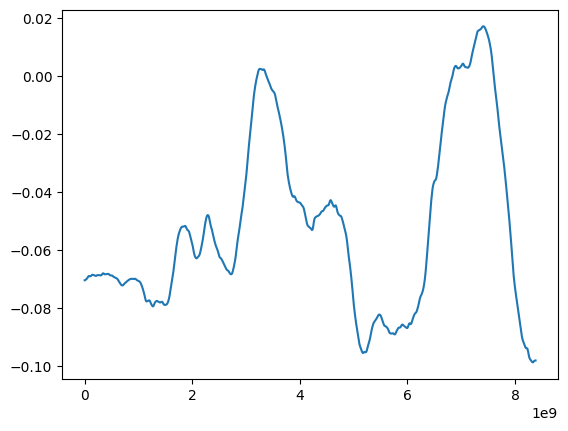

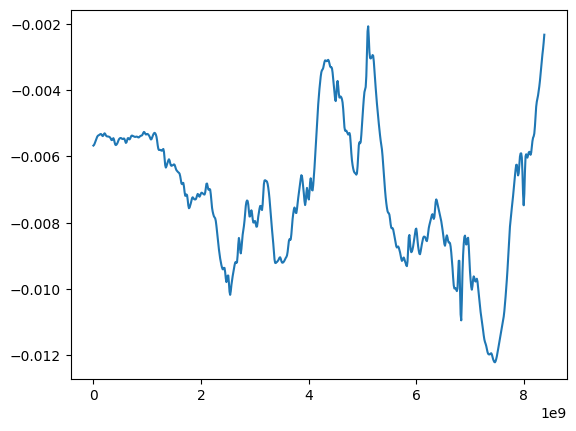

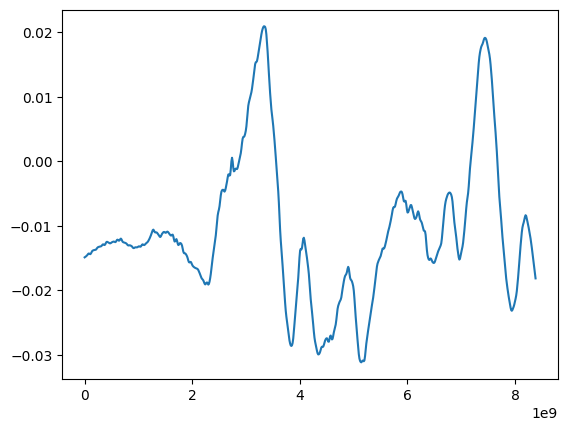

In [7]:
for i in range(45):
    plt.plot(df.iloc[:, i], title=f"{}")
    plt.show()